
<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning">
</div>


# Exploratory Data Analysis and Feature Engineering

In this lesson, we’ll walk you through basic exploratory data analysis and the process of creating and storing a feature table in the Feature Store. We’ll begin by demonstrating how to load data into a Spark DataFrame, view essential statistical information, and perform visual analysis using both built-in tools and code. Next, we’ll create a feature table, showing you how to store and explore it within the Feature Store UI. By the end of this demo, you should have a foundational understanding of the key steps involved in creating a feature table for Feature Engineering.

## **Learning Objectives**:

_By the end of this demo, you will be able to:_


1. **Perform Basic Exploratory Data Analysis (EDA):**
    - Utilize Spark and Pandas to store our data as a DataFrame.
    - Use built-in functionality to analyze data from a statistical perspective. Additionally, we will visualize the summary statistics. 


2. **Introduction to Feature Engineering with Databricks:**
    - Create a feature table and store it in Feature Store from a PySpark DataFrame.
    - Inspect the Feature Store table using the UI and from the notebook.


## Requirements

Please review the following requirements before starting the lesson:

* To run this notebook, you need to use one of the following Databricks runtime(s): **15.4.x-cpu-ml-scala2.12 15.4.x-scala2.12**


## Classroom Setup

To get into the lesson, we first need to build some data assets and define some configuration variables required for this demonstration. When running the following cell, the output is hidden so our space isn't cluttered. To view the details of the output, you can hover over the next cell and click the eye icon. 

The cell after the setup, titled `View Setup Variables`, displays the various variables that were created. You can click the Catalog icon in the notebook space to the right to see that your catalog was created with no data.

In [0]:
%run ../Includes/Classroom-Setup-02

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


Resetting the learning environment:
| dropping the catalog "labuser8027617_1732830335_zsw6_da"...(0 seconds)

Skipping install of existing datasets to "dbfs:/mnt/dbacademy-datasets/get-started-with-databricks-for-machine-learning/v01"

Validating the locally installed datasets:
| listing local files...(1 seconds)
| validation completed...(1 seconds total)
Creating & using the catalog "labuser8027617_1732830335_zsw6_da"...(0 seconds)

Predefined tables in "labuser8027617_1732830335_zsw6_da.default":
| -none-

Predefined paths variables:
| DA.paths.working_dir: dbfs:/mnt/dbacademy-users/labuser8027617_1732830335@vocareum.com/get-started-with-databricks-for-machine-learning
| DA.paths.datasets:    dbfs:/mnt/dbacademy-datasets/get-started-with-databricks-for-machine-learning/v01

Setup completed (4 seconds)


In [0]:
print(f"Username:          {DA.username}")
print(f"Catalog Name:      {DA.catalog_name}")
print(f"Schema Name:       {DA.schema_name}")
print(f"Working Directory: {DA.paths.working_dir}")
print(f"User DB Location:  {DA.paths.user_db}")

Username:          labuser8027617_1732830335@vocareum.com
Catalog Name:      labuser8027617_1732830335_zsw6_da
Schema Name:       default
Working Directory: dbfs:/mnt/dbacademy-users/labuser8027617_1732830335@vocareum.com/get-started-with-databricks-for-machine-learning
User DB Location:  None


## Part 1: Perform Basic Exploratory Data Analysis (EDA)

In this section, we will show how you can utilize Databricks Notebooks for exploratory analysis. This will be presented in two flavors: built-in tools and demonstrative custom code.

### Read and Inspect the Dataset

In this section, we will utilize a fictional dataset from a Telecom Company, which includes customer information. This dataset encompasses customer demographics, including gender, as well as internet subscription details such as subscription plans and payment methods. 

The next cell will create one table: `customers`. Let's create two different dataframes, one using Spark and one using Pandas.  


In [0]:
DA.create_customers_table()
df = spark.read.table('customers')
pdf = df.toPandas()

display(df)

CustomerID Gender SeniorCitizen PhoneService MultipleLines PaymentMethod MonthlyCharges Churn 0002-ORFBO Female 0 Yes No Mailed check 65.6 No 0003-MKNFE Male 0 Yes Yes Mailed check 59.9 No 0004-TLHLJ Male 0 Yes No Electronic check 73.9 Yes 0011-IGKFF Male 1 Yes No Electronic check 98.0 Yes 0013-EXCHZ Female 1 Yes No Mailed check 83.9 Yes 0013-MHZWF Female 0 Yes No Credit card (automatic) 69.4 No 0014-BMAQU Male 0 Yes Yes Credit card (automatic) 84.65 No 0015-UOCOJ Female 1 Yes No Electronic check 48.2 No 0016-QLJIS Female 0 Yes Yes Mailed check 90.45 No 0017-DINOC Male 0 No No phone service Credit card (automatic) 45.2 No 0017-IUDMW Female 0 Yes Yes Credit card (automatic) 116.8 No 0018-NYROU Female 0 Yes No Electronic check 68.95 No 0019-EFAEP Female 0 Yes Yes Bank transfer (automatic) 101.3 No 0019-GFNTW Female 0 No No phone service Bank transfer (automatic) 45.05 No 0020-INWCK Female 0 Yes Yes Credit card (automatic) 95.75 No 0020-JDNXP Female 0 No No phone service Mailed check 61.25 No 0021-IKXGC Female 1 Yes Yes Electronic check 72.1 No 0022-TCJCI Male 1 Yes No Credit card (automatic) 62.7 Yes 0023-HGHWL Male 1 No No phone service Electronic check 25.1 Yes 0023-UYUPN Female 1 Yes Yes Electronic check 25.2 No 0023-XUOPT Female 0 Yes Yes Electronic check 94.1 Yes 0027-KWYKW Female 0 Yes Yes Electronic check 83.75 No 0030-FNXPP Female 0 Yes No Mailed check 19.85 No 0031-PVLZI Female 0 Yes No Mailed check 20.35 Yes 0032-PGELS Female 0 No No phone service Bank transfer (automatic) 30.5 Yes 0036-IHMOT Female 0 Yes No Bank transfer (automatic) 103.7 No 0040-HALCW Male 0 Yes No Credit card (automatic) 20.4 No 0042-JVWOJ Male 0 Yes No Bank transfer (automatic) 19.6 No 0042-RLHYP Female 0 Yes No Bank transfer (automatic) 19.7 No 0048-LUMLS Male 0 Yes No Credit card (automatic) 91.2 No 0048-PIHNL Female 0 Yes No Bank transfer (automatic) 20.45 No 0052-DCKON Male 0 Yes Yes Bank transfer (automatic) 115.8 No 0052-YNYOT Female 0 Yes No Electronic check 20.55 No 0056-EPFBG Male 0 No No phone service Credit card (automatic) 39.4 No 0057-QBUQH Female 0 Yes Yes Electronic check 25.1 No 0058-EVZWM Female 0 Yes Yes Bank transfer (automatic) 89.8 No 0060-FUALY Female 0 Yes Yes Electronic check 94.75 No 0064-SUDOG Female 0 Yes No Bank transfer (automatic) 20.3 No 0064-YIJGF Male 0 Yes Yes Bank transfer (automatic) 75.75 No 0067-DKWBL Male 1 Yes No Electronic check 49.25 Yes 0068-FIGTF Female 0 Yes No Mailed check 78.2 No 0071-NDAFP Male 0 Yes Yes Credit card (automatic) 25.5 No 0074-HDKDG Male 0 Yes No Bank transfer (automatic) 61.6 No 0076-LVEPS Male 0 No No phone service Mailed check 45.0 No 0078-XZMHT Male 0 Yes Yes Bank transfer (automatic) 85.15 No 0080-EMYVY Female 0 Yes No Credit card (automatic) 51.45 No 0082-LDZUE Male 0 Yes No Mailed check 44.3 No 0082-OQIQY Male 0 Yes No Electronic check 94.2 No 0083-PIVIK Male 0 Yes Yes Electronic check 81.25 No 0089-IIQKO Female 0 Yes Yes Credit card (automatic) 99.95 No 0093-EXYQL Female 1 Yes No Electronic check 91.55 No 0093-XWZFY Male 0 Yes Yes Credit card (automatic) 104.5 Yes 0094-OIFMO Female 1 Yes No Electronic check 95.0 Yes 0096-BXERS Female 0 Yes Yes Electronic check 50.35 No 0096-FCPUF Male 0 Yes Yes Mailed check 64.5 No 0098-BOWSO Male 0 Yes No Electronic check 19.4 No 0100-DUVFC Male 1 Yes Yes Electronic check 104.8 No 0103-CSITQ Female 0 Yes Yes Bank transfer (automatic) 109.4 No 0104-PPXDV Male 0 Yes No Credit card (automatic) 50.3 No 0106-GHRQR Male 0 Yes Yes Bank transfer (automatic) 71.4 No 0106-UGRDO Female 0 Yes Yes Electronic check 116.0 No 0107-WESLM Male 0 Yes No Electronic check 19.85 Yes 0107-YHINA Male 0 Yes Yes Electronic check 99.75 Yes 0111-KLBQG Male 1 Yes No Mailed check 93.95 No 0112-QAWRZ Male 0 Yes Yes Bank transfer (automatic) 90.8 No 0112-QWPNC Male 0 Yes Yes Electronic check 84.35 Yes 0114-IGABW Female 0 No No phone service Bank transfer (automatic) 58.25 No 0114-PEGZZ Female 0 Yes Yes Electronic check 107.55 No 0114-RSRRW Female 0 Yes No Bank transfer (automa

### Inspect Statistics: Numerical Values and Visuals

Here we will exhibit different ways in which you can display and visualize descriptive statistics. 
1. `dbutils.data.summarize(<spark_or_pandas_dataframe>)` - This method will separate out numerical and categorical features within your Spark or Pandas DataFrame. It also displays histograms and quartile estimates. There are various options available in the generated profile such as resizing and feature search. You can consider this a more managed approach for summarizing statistics. 
2. `describe(<spark_or_pandas_dataframe>)` - This method will only return a table with the necessary information. You can recover the generated profile like that in the dbutils approach by adding a data profile. 
    - Click on the **+** icon and select **data profile**. 
3. `display(<spark_or_pandas_dataframe>)` - This will return the table. From this, we can build a visual to inspect the feature variables. 
4. Custom code - We can use the Pandas Dataframe along with other Python libraries to build custom visualizations.

In [0]:
dbutils.data.summarize(pdf)

<!DOCTYPE html>

In [0]:
display(df.describe())

summary CustomerID Gender SeniorCitizen PhoneService MultipleLines PaymentMethod MonthlyCharges Churn count 6976 6976 6976 6976 6976 6976 6976 6976 mean null null 0.16184059633027523 null null null 64.7431837729358 null stddev null null 0.3683309184454717 null null null 30.08453450290367 null min 0002-ORFBO Female 0 No No Bank transfer (automatic) 18.25 No max 9995-HOTOH Male 1 Yes Yes Mailed check 118.75 Yes

In [0]:
print(pdf.describe())

       SeniorCitizen  MonthlyCharges
count    6976.000000     6976.000000
mean        0.161841       64.743184
std         0.368331       30.084535
min         0.000000       18.250000
25%         0.000000       35.500000
50%         0.000000       70.300000
75%         0.000000       89.850000
max         1.000000      118.750000


In [0]:
display(df)

CustomerID Gender SeniorCitizen PhoneService MultipleLines PaymentMethod MonthlyCharges Churn 0002-ORFBO Female 0 Yes No Mailed check 65.6 No 0003-MKNFE Male 0 Yes Yes Mailed check 59.9 No 0004-TLHLJ Male 0 Yes No Electronic check 73.9 Yes 0011-IGKFF Male 1 Yes No Electronic check 98.0 Yes 0013-EXCHZ Female 1 Yes No Mailed check 83.9 Yes 0013-MHZWF Female 0 Yes No Credit card (automatic) 69.4 No 0014-BMAQU Male 0 Yes Yes Credit card (automatic) 84.65 No 0015-UOCOJ Female 1 Yes No Electronic check 48.2 No 0016-QLJIS Female 0 Yes Yes Mailed check 90.45 No 0017-DINOC Male 0 No No phone service Credit card (automatic) 45.2 No 0017-IUDMW Female 0 Yes Yes Credit card (automatic) 116.8 No 0018-NYROU Female 0 Yes No Electronic check 68.95 No 0019-EFAEP Female 0 Yes Yes Bank transfer (automatic) 101.3 No 0019-GFNTW Female 0 No No phone service Bank transfer (automatic) 45.05 No 0020-INWCK Female 0 Yes Yes Credit card (automatic) 95.75 No 0020-JDNXP Female 0 No No phone service Mailed check 61.25 No 0021-IKXGC Female 1 Yes Yes Electronic check 72.1 No 0022-TCJCI Male 1 Yes No Credit card (automatic) 62.7 Yes 0023-HGHWL Male 1 No No phone service Electronic check 25.1 Yes 0023-UYUPN Female 1 Yes Yes Electronic check 25.2 No 0023-XUOPT Female 0 Yes Yes Electronic check 94.1 Yes 0027-KWYKW Female 0 Yes Yes Electronic check 83.75 No 0030-FNXPP Female 0 Yes No Mailed check 19.85 No 0031-PVLZI Female 0 Yes No Mailed check 20.35 Yes 0032-PGELS Female 0 No No phone service Bank transfer (automatic) 30.5 Yes 0036-IHMOT Female 0 Yes No Bank transfer (automatic) 103.7 No 0040-HALCW Male 0 Yes No Credit card (automatic) 20.4 No 0042-JVWOJ Male 0 Yes No Bank transfer (automatic) 19.6 No 0042-RLHYP Female 0 Yes No Bank transfer (automatic) 19.7 No 0048-LUMLS Male 0 Yes No Credit card (automatic) 91.2 No 0048-PIHNL Female 0 Yes No Bank transfer (automatic) 20.45 No 0052-DCKON Male 0 Yes Yes Bank transfer (automatic) 115.8 No 0052-YNYOT Female 0 Yes No Electronic check 20.55 No 0056-EPFBG Male 0 No No phone service Credit card (automatic) 39.4 No 0057-QBUQH Female 0 Yes Yes Electronic check 25.1 No 0058-EVZWM Female 0 Yes Yes Bank transfer (automatic) 89.8 No 0060-FUALY Female 0 Yes Yes Electronic check 94.75 No 0064-SUDOG Female 0 Yes No Bank transfer (automatic) 20.3 No 0064-YIJGF Male 0 Yes Yes Bank transfer (automatic) 75.75 No 0067-DKWBL Male 1 Yes No Electronic check 49.25 Yes 0068-FIGTF Female 0 Yes No Mailed check 78.2 No 0071-NDAFP Male 0 Yes Yes Credit card (automatic) 25.5 No 0074-HDKDG Male 0 Yes No Bank transfer (automatic) 61.6 No 0076-LVEPS Male 0 No No phone service Mailed check 45.0 No 0078-XZMHT Male 0 Yes Yes Bank transfer (automatic) 85.15 No 0080-EMYVY Female 0 Yes No Credit card (automatic) 51.45 No 0082-LDZUE Male 0 Yes No Mailed check 44.3 No 0082-OQIQY Male 0 Yes No Electronic check 94.2 No 0083-PIVIK Male 0 Yes Yes Electronic check 81.25 No 0089-IIQKO Female 0 Yes Yes Credit card (automatic) 99.95 No 0093-EXYQL Female 1 Yes No Electronic check 91.55 No 0093-XWZFY Male 0 Yes Yes Credit card (automatic) 104.5 Yes 0094-OIFMO Female 1 Yes No Electronic check 95.0 Yes 0096-BXERS Female 0 Yes Yes Electronic check 50.35 No 0096-FCPUF Male 0 Yes Yes Mailed check 64.5 No 0098-BOWSO Male 0 Yes No Electronic check 19.4 No 0100-DUVFC Male 1 Yes Yes Electronic check 104.8 No 0103-CSITQ Female 0 Yes Yes Bank transfer (automatic) 109.4 No 0104-PPXDV Male 0 Yes No Credit card (automatic) 50.3 No 0106-GHRQR Male 0 Yes Yes Bank transfer (automatic) 71.4 No 0106-UGRDO Female 0 Yes Yes Electronic check 116.0 No 0107-WESLM Male 0 Yes No Electronic check 19.85 Yes 0107-YHINA Male 0 Yes Yes Electronic check 99.75 Yes 0111-KLBQG Male 1 Yes No Mailed check 93.95 No 0112-QAWRZ Male 0 Yes Yes Bank transfer (automatic) 90.8 No 0112-QWPNC Male 0 Yes Yes Electronic check 84.35 Yes 0114-IGABW Female 0 No No phone service Bank transfer (automatic) 58.25 No 0114-PEGZZ Female 0 Yes Yes Electronic check 107.55 No 0114-RSRRW Female 0 Yes No Bank transfer (automa

In [0]:
from pyspark.sql import functions as F

# Grouping by 'SeniorCitizen' and calculating summary statistics for 'MonthlyCharges'
display(df.groupBy('SeniorCitizen').agg(
    F.min('MonthlyCharges').alias('min'),
    F.expr('percentile(MonthlyCharges, 0.25)').alias('Q1'),
    F.expr('percentile(MonthlyCharges, 0.5)').alias('median'),
    F.expr('percentile(MonthlyCharges, 0.75)').alias('Q3'),
    F.max('MonthlyCharges').alias('max')
))

SeniorCitizen min Q1 median Q3 max 1 18.95 70.15 84.85 98.1 117.45 0 18.25 25.6 65.75 86.65 118.75

### Custom Code for statistical breakdown 

Here is an example of how you can build custom code with matplotlib to reproduce the same graphs.

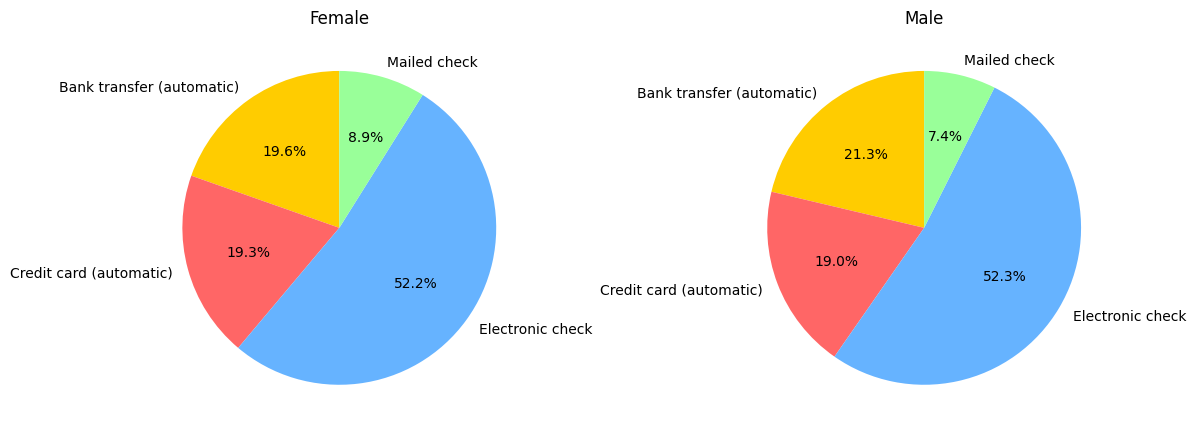

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping by Gender and PaymentMethod, summing the SeniorCitizen counts
grouped = pdf.groupby(['Gender', 'PaymentMethod']).SeniorCitizen.sum().unstack()

# Define colors for the pie chart sections
colors = ['#ffcc00', '#ff6666', '#66b3ff', '#99ff99']  # You can adjust these based on your preferred color scheme

# Create a subplot with 2 columns (for Male and Female)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Female
grouped_female = grouped.loc['Female']
axes[0].pie(grouped_female, labels=grouped_female.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Female')

# Plot for Male
grouped_male = grouped.loc['Male']
axes[1].pie(grouped_male, labels=grouped_male.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Male')

# Equal aspect ratio ensures that pie charts are circular.
plt.tight_layout()
plt.show()

## Part 2: Introduction to Feature Engineering on Databricks

After exploring our data for a bit, we see that it would be profitable to be able to predict churn. There are many things we can do to this dataset, such as one-hot-encoding, outlier analysis, etc. Instead, since this is just an introductory lesson, let's keep it simple and add an additional feature that separates out low, medium, and high monthly charges. This will add an additional feature to the data we already have. 



### Business Logic

Based on our analysis above, suppose business stakeholders give you the following guidelines for bucketing customers.

1. Low monthly charge: MonthlyCharges <= Q1
2. Average monthly charge: > Q1 and < Q3
3. High monthly charge: >= Q3

Let's take this business logic and create a new **feature** and store it in a feature table in our Feature Store.

In [0]:
feature_variables = ['Gender', 
                     'SeniorCitizen', 
                     'PhoneService', 
                     'MultipleLines', 
                     'PaymentMethod', 
                     'MonthlyCharges']
prediction_variable = 'Churn'
primary_key = ['customerID']

In [0]:
feature_df = df.select(primary_key + feature_variables)
display(feature_df)

customerID Gender SeniorCitizen PhoneService MultipleLines PaymentMethod MonthlyCharges 0002-ORFBO Female 0 Yes No Mailed check 65.6 0003-MKNFE Male 0 Yes Yes Mailed check 59.9 0004-TLHLJ Male 0 Yes No Electronic check 73.9 0011-IGKFF Male 1 Yes No Electronic check 98.0 0013-EXCHZ Female 1 Yes No Mailed check 83.9 0013-MHZWF Female 0 Yes No Credit card (automatic) 69.4 0014-BMAQU Male 0 Yes Yes Credit card (automatic) 84.65 0015-UOCOJ Female 1 Yes No Electronic check 48.2 0016-QLJIS Female 0 Yes Yes Mailed check 90.45 0017-DINOC Male 0 No No phone service Credit card (automatic) 45.2 0017-IUDMW Female 0 Yes Yes Credit card (automatic) 116.8 0018-NYROU Female 0 Yes No Electronic check 68.95 0019-EFAEP Female 0 Yes Yes Bank transfer (automatic) 101.3 0019-GFNTW Female 0 No No phone service Bank transfer (automatic) 45.05 0020-INWCK Female 0 Yes Yes Credit card (automatic) 95.75 0020-JDNXP Female 0 No No phone service Mailed check 61.25 0021-IKXGC Female 1 Yes Yes Electronic check 72.1 0022-TCJCI Male 1 Yes No Credit card (automatic) 62.7 0023-HGHWL Male 1 No No phone service Electronic check 25.1 0023-UYUPN Female 1 Yes Yes Electronic check 25.2 0023-XUOPT Female 0 Yes Yes Electronic check 94.1 0027-KWYKW Female 0 Yes Yes Electronic check 83.75 0030-FNXPP Female 0 Yes No Mailed check 19.85 0031-PVLZI Female 0 Yes No Mailed check 20.35 0032-PGELS Female 0 No No phone service Bank transfer (automatic) 30.5 0036-IHMOT Female 0 Yes No Bank transfer (automatic) 103.7 0040-HALCW Male 0 Yes No Credit card (automatic) 20.4 0042-JVWOJ Male 0 Yes No Bank transfer (automatic) 19.6 0042-RLHYP Female 0 Yes No Bank transfer (automatic) 19.7 0048-LUMLS Male 0 Yes No Credit card (automatic) 91.2 0048-PIHNL Female 0 Yes No Bank transfer (automatic) 20.45 0052-DCKON Male 0 Yes Yes Bank transfer (automatic) 115.8 0052-YNYOT Female 0 Yes No Electronic check 20.55 0056-EPFBG Male 0 No No phone service Credit card (automatic) 39.4 0057-QBUQH Female 0 Yes Yes Electronic check 25.1 0058-EVZWM Female 0 Yes Yes Bank transfer (automatic) 89.8 0060-FUALY Female 0 Yes Yes Electronic check 94.75 0064-SUDOG Female 0 Yes No Bank transfer (automatic) 20.3 0064-YIJGF Male 0 Yes Yes Bank transfer (automatic) 75.75 0067-DKWBL Male 1 Yes No Electronic check 49.25 0068-FIGTF Female 0 Yes No Mailed check 78.2 0071-NDAFP Male 0 Yes Yes Credit card (automatic) 25.5 0074-HDKDG Male 0 Yes No Bank transfer (automatic) 61.6 0076-LVEPS Male 0 No No phone service Mailed check 45.0 0078-XZMHT Male 0 Yes Yes Bank transfer (automatic) 85.15 0080-EMYVY Female 0 Yes No Credit card (automatic) 51.45 0082-LDZUE Male 0 Yes No Mailed check 44.3 0082-OQIQY Male 0 Yes No Electronic check 94.2 0083-PIVIK Male 0 Yes Yes Electronic check 81.25 0089-IIQKO Female 0 Yes Yes Credit card (automatic) 99.95 0093-EXYQL Female 1 Yes No Electronic check 91.55 0093-XWZFY Male 0 Yes Yes Credit card (automatic) 104.5 0094-OIFMO Female 1 Yes No Electronic check 95.0 0096-BXERS Female 0 Yes Yes Electronic check 50.35 0096-FCPUF Male 0 Yes Yes Mailed check 64.5 0098-BOWSO Male 0 Yes No Electronic check 19.4 0100-DUVFC Male 1 Yes Yes Electronic check 104.8 0103-CSITQ Female 0 Yes Yes Bank transfer (automatic) 109.4 0104-PPXDV Male 0 Yes No Credit card (automatic) 50.3 0106-GHRQR Male 0 Yes Yes Bank transfer (automatic) 71.4 0106-UGRDO Female 0 Yes Yes Electronic check 116.0 0107-WESLM Male 0 Yes No Electronic check 19.85 0107-YHINA Male 0 Yes Yes Electronic check 99.75 0111-KLBQG Male 1 Yes No Mailed check 93.95 0112-QAWRZ Male 0 Yes Yes Bank transfer (automatic) 90.8 0112-QWPNC Male 0 Yes Yes Electronic check 84.35 0114-IGABW Female 0 No No phone service Bank transfer (automatic) 58.25 0114-PEGZZ Female 0 Yes Yes Electronic check 107.55 0114-RSRRW Female 0 Yes No Bank transfer (automatic) 19.95 0115-TFERT Male 0 Yes Yes Electronic check 111.2 0117-LFRMW Male 0 No No phone service Bank transfer (automatic) 40.2 0118-JPNOY Female 1 Yes No Credit card (automatic) 85.8 0121-SNYRK Male 0 No No phone service M

In [0]:
from pyspark.sql.functions import col, expr, when

quantiles = feature_df.approxQuantile("MonthlyCharges", [0.25, 0.75], 0.0)

Q1, Q3 = quantiles

feature_df2 = feature_df.withColumn(
    "ChargeCategory",
    when(col("MonthlyCharges") <= Q1, "Low")
    .when((col("MonthlyCharges") > Q1) & (col("MonthlyCharges") < Q3), "Average")
    .otherwise("High")
)

display(feature_df2)

customerID Gender SeniorCitizen PhoneService MultipleLines PaymentMethod MonthlyCharges ChargeCategory 0002-ORFBO Female 0 Yes No Mailed check 65.6 Average 0003-MKNFE Male 0 Yes Yes Mailed check 59.9 Average 0004-TLHLJ Male 0 Yes No Electronic check 73.9 Average 0011-IGKFF Male 1 Yes No Electronic check 98.0 High 0013-EXCHZ Female 1 Yes No Mailed check 83.9 Average 0013-MHZWF Female 0 Yes No Credit card (automatic) 69.4 Average 0014-BMAQU Male 0 Yes Yes Credit card (automatic) 84.65 Average 0015-UOCOJ Female 1 Yes No Electronic check 48.2 Average 0016-QLJIS Female 0 Yes Yes Mailed check 90.45 High 0017-DINOC Male 0 No No phone service Credit card (automatic) 45.2 Average 0017-IUDMW Female 0 Yes Yes Credit card (automatic) 116.8 High 0018-NYROU Female 0 Yes No Electronic check 68.95 Average 0019-EFAEP Female 0 Yes Yes Bank transfer (automatic) 101.3 High 0019-GFNTW Female 0 No No phone service Bank transfer (automatic) 45.05 Average 0020-INWCK Female 0 Yes Yes Credit card (automatic) 95.75 High 0020-JDNXP Female 0 No No phone service Mailed check 61.25 Average 0021-IKXGC Female 1 Yes Yes Electronic check 72.1 Average 0022-TCJCI Male 1 Yes No Credit card (automatic) 62.7 Average 0023-HGHWL Male 1 No No phone service Electronic check 25.1 Low 0023-UYUPN Female 1 Yes Yes Electronic check 25.2 Low 0023-XUOPT Female 0 Yes Yes Electronic check 94.1 High 0027-KWYKW Female 0 Yes Yes Electronic check 83.75 Average 0030-FNXPP Female 0 Yes No Mailed check 19.85 Low 0031-PVLZI Female 0 Yes No Mailed check 20.35 Low 0032-PGELS Female 0 No No phone service Bank transfer (automatic) 30.5 Low 0036-IHMOT Female 0 Yes No Bank transfer (automatic) 103.7 High 0040-HALCW Male 0 Yes No Credit card (automatic) 20.4 Low 0042-JVWOJ Male 0 Yes No Bank transfer (automatic) 19.6 Low 0042-RLHYP Female 0 Yes No Bank transfer (automatic) 19.7 Low 0048-LUMLS Male 0 Yes No Credit card (automatic) 91.2 High 0048-PIHNL Female 0 Yes No Bank transfer (automatic) 20.45 Low 0052-DCKON Male 0 Yes Yes Bank transfer (automatic) 115.8 High 0052-YNYOT Female 0 Yes No Electronic check 20.55 Low 0056-EPFBG Male 0 No No phone service Credit card (automatic) 39.4 Average 0057-QBUQH Female 0 Yes Yes Electronic check 25.1 Low 0058-EVZWM Female 0 Yes Yes Bank transfer (automatic) 89.8 Average 0060-FUALY Female 0 Yes Yes Electronic check 94.75 High 0064-SUDOG Female 0 Yes No Bank transfer (automatic) 20.3 Low 0064-YIJGF Male 0 Yes Yes Bank transfer (automatic) 75.75 Average 0067-DKWBL Male 1 Yes No Electronic check 49.25 Average 0068-FIGTF Female 0 Yes No Mailed check 78.2 Average 0071-NDAFP Male 0 Yes Yes Credit card (automatic) 25.5 Low 0074-HDKDG Male 0 Yes No Bank transfer (automatic) 61.6 Average 0076-LVEPS Male 0 No No phone service Mailed check 45.0 Average 0078-XZMHT Male 0 Yes Yes Bank transfer (automatic) 85.15 Average 0080-EMYVY Female 0 Yes No Credit card (automatic) 51.45 Average 0082-LDZUE Male 0 Yes No Mailed check 44.3 Average 0082-OQIQY Male 0 Yes No Electronic check 94.2 High 0083-PIVIK Male 0 Yes Yes Electronic check 81.25 Average 0089-IIQKO Female 0 Yes Yes Credit card (automatic) 99.95 High 0093-EXYQL Female 1 Yes No Electronic check 91.55 High 0093-XWZFY Male 0 Yes Yes Credit card (automatic) 104.5 High 0094-OIFMO Female 1 Yes No Electronic check 95.0 High 0096-BXERS Female 0 Yes Yes Electronic check 50.35 Average 0096-FCPUF Male 0 Yes Yes Mailed check 64.5 Average 0098-BOWSO Male 0 Yes No Electronic check 19.4 Low 0100-DUVFC Male 1 Yes Yes Electronic check 104.8 High 0103-CSITQ Female 0 Yes Yes Bank transfer (automatic) 109.4 High 0104-PPXDV Male 0 Yes No Credit card (automatic) 50.3 Average 0106-GHRQR Male 0 Yes Yes Bank transfer (automatic) 71.4 Average 0106-UGRDO Female 0 Yes Yes Electronic check 116.0 High 0107-WESLM Male 0 Yes No Electronic check 19.85 Low 0107-YHINA Male 0 Yes Yes Electronic check 99.75 High 0111-KLBQG Male 1 Yes No Mailed check 93.95 High 0112-QAWRZ Male 0 Yes Yes Bank transfer (automatic) 90.8 High 0112-QWPNC Male 0 Yes Yes Electro

### Save features to feature table

Now that we have our feature store created, let's store it as a feature table within Feature Store. We have all the ingredients we need to do this within Databricks Unity Catalog: 
1. Feature table (Spark DataFrame)
2. Primary key (designated feature)

In [0]:
from databricks.feature_engineering import FeatureEngineeringClient

# Instantiate the FeatureEngineeringClient
fe = FeatureEngineeringClient()

In [0]:
# Set the feature table name for storage in UC
feature_table_name = f'{DA.catalog_name}.{DA.schema_name}.customers_features'

print(f"The name of the feature table: {feature_table_name}\n\n")

# Create the feature table
fe.create_table(
    name = feature_table_name,
    primary_keys = primary_key,
    df = feature_df2, 
    description="Telco customer features", 
    tags = {"source": "bronze", "format": "delta"}
)

The name of the feature table: labuser8027617_1732830335_zsw6_da.default.customers_features




2024/11/28 22:11:17 INFO databricks.ml_features._compute_client._compute_client: Setting columns ['customerID'] of table 'labuser8027617_1732830335_zsw6_da.default.customers_features' to NOT NULL.
2024/11/28 22:11:20 INFO databricks.ml_features._compute_client._compute_client: Setting Primary Keys constraint ['customerID'] on table 'labuser8027617_1732830335_zsw6_da.default.customers_features'.
2024/11/28 22:11:33 INFO databricks.ml_features._compute_client._compute_client: Created feature table 'labuser8027617_1732830335_zsw6_da.default.customers_features'.


<FeatureTable: name='labuser8027617_1732830335_zsw6_da.default.customers_features', table_id='50b8b9a2-b773-425b-be66-984986332549', description='Telco customer features', primary_keys=['customerID'], partition_columns=[], features=['customerID',
 'Gender',
 'SeniorCitizen',
 'PhoneService',
 'MultipleLines',
 'PaymentMethod',
 'MonthlyCharges',
 'ChargeCategory'], creation_timestamp=1732831876591, online_stores=[], notebook_producers=[], job_producers=[], table_data_sources=[], path_data_sources=[], custom_data_sources=[], timestamp_keys=[], tags={'format': 'delta', 'source': 'bronze'}>

Now, go inspect your feature table using the UI!

## Clean Up the Workspace

Run the following cell to remove data assets created during this lesson.

In [0]:
DA.cleanup()

# Conclusion And Next Steps

In this lesson, we learned about basic EDA and how to perform feature engineering and save the result to our feature store. Notice that all a feature table is a Delta table that has a primary key. However, Features allows us to separate out those tables that will be used for ML versus those that will not. In the next lesson, we will be introduced to AutoML - Databricks automated machine learning tool that can be used to establish a baseline model as well as verify the predictive power of a given dataset.


&copy; 2024 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the 
<a href="https://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/><a href="https://databricks.com/privacy-policy">Privacy Policy</a> | 
<a href="https://databricks.com/terms-of-use">Terms of Use</a> | 
<a href="https://help.databricks.com/">Support</a>